# INF01017 - Aprendizado de Máquina - INF/UFRGS

## Atividade Prática: Árvores de Decisão

As árvores de decisão são conhecidas por possuírem um baixo viés, ao mesmo tempo em que apresentam alta variância.
Isto é, o método é capaz de modelar fronteiras de decisão bastante complexas, o que, por um lado, é positivo, mas torna o algoritmo bastante suscetível a ruído ou a padrões nos dados de treino que não generalizam para instâncias de teste.
Por isso, técnicas de poda são fundamentais para o uso efetivo do modelo em dados novos.

Nessa atividade, iremos analisar como a estrutura e as predições da árvore de decisão são afetadas por pequenas variações no conjunto de treino. Além disso, veremos duas técnicas de poda que podem ser usadas para controlar a complexidade do modelo.

**Este *colab* deve ser usado como base para o preenchimento do questionário encontrado no Moodle. Faça uma cópia do mesmo para realizar o exercício.** A forma mais fácil para duplicar este *colab* é ir em File > "Save a Copy in Drive". Não é necessário entregar este *colab* preenchido, mas guarde-o para caso ache que algum questionário está errado.


### Objetivos da Atividade
* Analisar os impactos da característica de **variância** nas árvores de decisão.
* Analisar o efeito da **poda** em árvores de decisão.


## Carregamento dos Dados

Além de possuir uma grande quantidade de algoritmos de aprendizado de máquina, a biblioteca [scikit-learn](https://scikit-learn.org/stable/index.html) possui também funções para carregar alguns conjuntos de dados.

Nessa seção, vamos usar essas funções para carregar o dataset [Breast Cancer Winconsin](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset). Esse dataset possui um total de 30 atributos relativos a características de tumores de mama e um atributo alvo binário, que indica se o tumor é maligno ou benigno. Todos os 30 atributos são valores reais.

### Obtenção e análise dos dados
O código abaixo carrega o dataset utilizando as funções do scikit-learn e mostra algumas informações básicas sobre os dados

In [1]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data  # matriz contendo os atributos
y = data.target  # vetor contendo a classe (0 para maligno e 1 para benigno) de cada instância
feature_names = data.feature_names  # nome de cada atributo
target_names = data.target_names  # nome de cada classe

print(f"Dimensões de X: {X.shape}\n")
print(f"Dimensões de y: {y.shape}\n")
print(f"Nomes dos atributos: {feature_names}\n")
print(f"Nomes das classes: {target_names}")

Dimensões de X: (569, 30)

Dimensões de y: (569,)

Nomes dos atributos: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Nomes das classes: ['malignant' 'benign']


Como pode ser visto, o dataset possui 569 exemplos, sendo cada exemplo constituído por 30 diferentes atributos.

### Quantidade de Exemplos de cada Classe
É possível também contar quantos exemplos pertencem à classe dos tumores malignos e quantos à classe dos benignos

In [2]:
import numpy as np

n_malign = np.sum(y == 0)
n_benign = np.sum(y == 1)

print("Número de exemplos malignos: %d" % n_malign)
print("Número de exemplos benignos: %d" % n_benign)

Número de exemplos malignos: 212
Número de exemplos benignos: 357


## Variância nas Árvores de Decisão


### Analisando a Estrutura das Árvores

Como estudado em aula, a árvore de decisão é conhecida por ser um classificador com alta variância. Isso possui consequências na estrutura das árvores treinadas.

O código abaixo treina várias árvores de decisão com diferentes conjuntos de treino obtidos através do método holdout.
Use-o para responder à Questão 1 do questionário.


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split  # função do scikit-learn que implementa um holdout


def get_root_node(dt, feature_names):
    feature_idx = dt.tree_.feature[0]
    return feature_names[feature_idx]


n_repeats = 20
root_nodes = []

# variando o seed do holdout, geramos conjuntos de treino e teste um pouco diferentes a cada iteração
for split_random_state in range(0, n_repeats):
  # Holdout com 20% de dados de teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=split_random_state)

  # Treinamento da árvore usando os dados de treino
  dt = DecisionTreeClassifier(random_state=0)
  dt.fit(X_train, y_train)

  # Obtemos o atributo usado na raiz e o salvamos na lista
  root_node = get_root_node(dt, feature_names)
  root_nodes.append(root_node)

root_nodes

['worst concave points',
 'worst perimeter',
 'worst perimeter',
 'worst concave points',
 'worst perimeter',
 'worst concave points',
 'worst concave points',
 'worst area',
 'worst perimeter',
 'worst radius',
 'worst perimeter',
 'worst perimeter',
 'worst radius',
 'worst radius',
 'worst radius',
 'worst area',
 'worst perimeter',
 'worst concave points',
 'worst concave points',
 'mean concave points']

### Análise da Variação na Acurácia

A propriedade de variância também implica em efeitos na variabilidade da performance dos modelos.
Podemos usar a acurácia como medida de performance, o que pode ser feito também através do scikit-learn. Posteriormente estudaremos outras métricas de desempenho que são mais indicadas para problemas em que o número de instâncias por classe é desbalanceado, como é o caso deste conjunto de dados.

In [7]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia nos dados de teste: %.3f" % accuracy)


Acurácia nos dados de teste: 0.965


O código abaixo executa repetidas vezes o treinamento das árvores de decisão, da mesma forma que no item *Analisando a Estrutura das Árvores*.
Modifique-o de forma a obter a acurácia para cada execução e então calcule a média, desvio padrão, máximo e mínimo dos valores. Use esses resultados para responder à Questão 2.

**Atenção: Não mude os valores que estão sendo passados para os parâmetros random_state para garantir a reprodutibilidade do código**.


In [8]:
n_repeats = 20
accuracies = []

accuracies_set = []
# variando o seed do holdout, geramos conjuntos de treino e teste um pouco diferentes a cada iteração
for split_random_state in range(0, n_repeats):
  # Holdout com 20% de dados de teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=split_random_state)

  # Nova instância da árvore de decisão
  dt = DecisionTreeClassifier(random_state=0)

  # Treine a árvore de decisão usando os dados de treino
  dt.fit(X_train, y_train)

  # Calcule a acurácia nos dados de teste
  y_pred = dt.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracies_set.append(accuracy)

# Calcule a média, desvio padrão, máximo e mínimo das acurácias (pode usar numpy)
accuracies_set = np.array(accuracies_set)
print("Acurácia média: %.3f" % accuracies_set.mean())
print("Desvio padrão: %.3f" % accuracies_set.std())
print("Acurácia máxima: %.3f" % accuracies_set.max())
print("Acurácia mínima: %.3f" % accuracies_set.min())




Acurácia média: 0.929
Desvio padrão: 0.024
Acurácia máxima: 0.956
Acurácia mínima: 0.877


### Análise de Instância individuais

1. Treine novamente uma árvore de decisão usando um novo conjunto de treino gerado com a função train_test_split. Utilize 20% de dados de teste e, desta vez, não **especifique valor nenhum para o random_state**.

2. Faça a predição para as instâncias especificadas abaixo e preencha na tabela do excel indicada no **Moodle** a classificação encontrada (0 para maligno e 1 para benigno).

In [80]:
X_interesting = X[[40, 86, 297, 135, 73], :]
y_interesting = y[[40, 86, 297, 135, 73]]

# 1. Instancie uma nova árvore de decisão, dessa vez sem especificar o valor de random_state
dt = DecisionTreeClassifier()
# 2. Separe o conjunto em treino e teste, dessa vez sem especificar o valor de random_state
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)
# 3. Treine a nova árvore usando o conjunto de treino
dt.fit(x_train, y_train)
# 4. Use a nova árvore treinada para obter predições para os valores de X_interesting acima.
y_pred = dt.predict(X_interesting)
accuracy = accuracy_score(y_interesting, y_pred)

print(f"Valores preditos: {y_pred}")
print(f"Valores reais: {y_interesting}")
print(f"Acurácia: {accuracy}")

Valores preditos: [0 0 0 1 0]
Valores reais: [0 0 0 0 0]
Acurácia: 0.8


## O Efeito da Poda

As árvores de decisão treinadas nos itens anteriores não possuíam nenhuma forma de poda. No entanto, é possível utilizar técnicas de poda através do scikit-learn. Como consequência, elas podem ter uma complexidade além do que é necessário na modelagem do problema.



### Exemplo de Pré-poda: profundidade máxima da árvore
Podemos especificar a profundidade máxima da árvore utilizando o parâmetro max_depth.

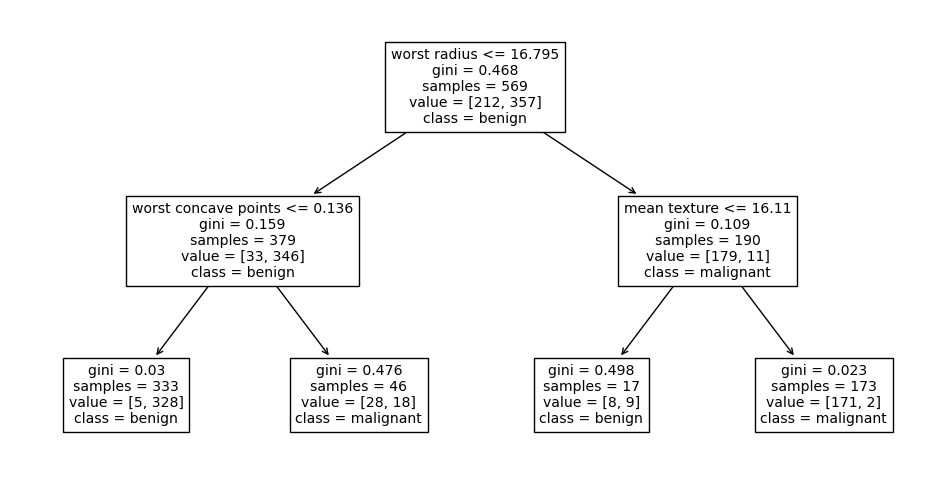

In [91]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X, y)

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(12,6))
_ = plot_tree(dt, feature_names=feature_names, class_names=target_names)

O código abaixo gera árvores de decisão com diferentes profundidades máximas e as avalia em termos de acurácia.

Observe que todas as árvores são treinadas e avaliadas com os mesmos conjuntos de treino e teste, visto que especificamos o parâmetro $random\_state = 0$.

Com base nesse código, e possíveis modificações que você faça a ele, responda à Questão  4 do questionário.

**Não mude o valor que está sendo passado em random_state=0**.


Acurácia de treino para profundidade 1: 0.9230769230769231
Acurácia de teste para profundidade 1: 0.9035087719298246
Acurácia de treino para profundidade 2: 0.9516483516483516
Acurácia de teste para profundidade 2: 0.9649122807017544
Acurácia de treino para profundidade 3: 0.9714285714285714
Acurácia de teste para profundidade 3: 0.9649122807017544
Acurácia de treino para profundidade 4: 0.9846153846153847
Acurácia de teste para profundidade 4: 0.956140350877193
Acurácia de treino para profundidade 5: 0.989010989010989
Acurácia de teste para profundidade 5: 0.9473684210526315
Acurácia de treino para profundidade 6: 0.9934065934065934
Acurácia de teste para profundidade 6: 0.9473684210526315
Acurácia de treino para profundidade 7: 0.9956043956043956
Acurácia de teste para profundidade 7: 0.9473684210526315
Acurácia de treino para profundidade 8: 0.9978021978021978
Acurácia de teste para profundidade 8: 0.9473684210526315
Acurácia de treino para profundidade 9: 1.0
Acurácia de teste para

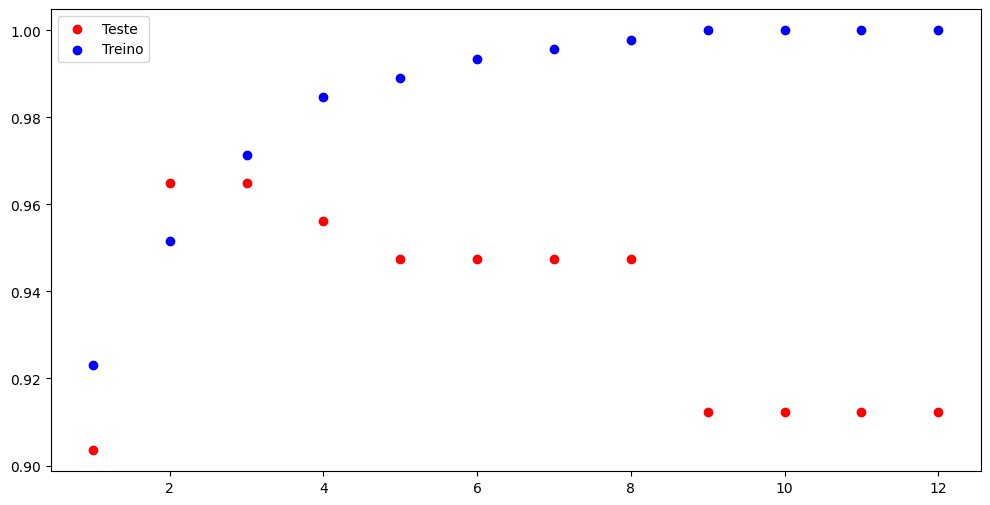

In [96]:
import numpy as np
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, None]  # None faz com que essa poda não seja aplicada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
accuracies = []
train_accuracies = []
for depth in max_depths:
  dt = DecisionTreeClassifier(max_depth=depth, random_state=0)
  dt.fit(X_train, y_train)

  y_pred = dt.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  train_acc = accuracy_score(y_train, dt.predict(X_train))
  accuracies.append(acc)
  train_accuracies.append(train_acc)
  print(f"Acurácia de treino para profundidade {depth}: {train_acc}")
  print(f"Acurácia de teste para profundidade {depth}: {acc}")
accuracies = np.array(accuracies)
train_accuracies = np.array(train_accuracies)

plt.figure(figsize=(12,6))
plt.scatter(max_depths, accuracies, c='r')
plt.scatter(max_depths, train_accuracies, c='b')
plt.legend(['Teste', 'Treino'])

### Exemplo de Pós-poda: Custo-complexidade

A biblioteca scikit-learn possui uma implementação de pós-poda por custo-complexidade, baseada no parâmetro de custo-complexidade $\alpha \ge 0$.

Na implementação descrita na biblioteca, é definido também um custo-complexidade efetivo do nodo. Quanto maior for a taxa de erros ao se podar a subárvore de um nodo, maior será seu custo-complexidade efetivo. Além disso, quanto maior for a complexidade (número de nodos terminais) da subárvore do nodo, menor será seu custo-complexidade efetivo.
Em resumo, um nodo com alto custo-complexidade efetivo é um nodo importante para diminuir a taxa de erros e com baixa complexidade.

Dentro da biblioteca, passamos um parâmetro $ccp\_alpha$ que serve como um custo-complexidade efetivo de corte: subárvores são podadas enquanto houver nodos com custo-complexidade menor do que o parâmetro $ccp\_alpha$.
Ou seja, quando maior for o parâmetro, mais intensa será a poda.

Para mais informações:
* https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning
* https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

Use o código abaixo para resolver à Questão 5.

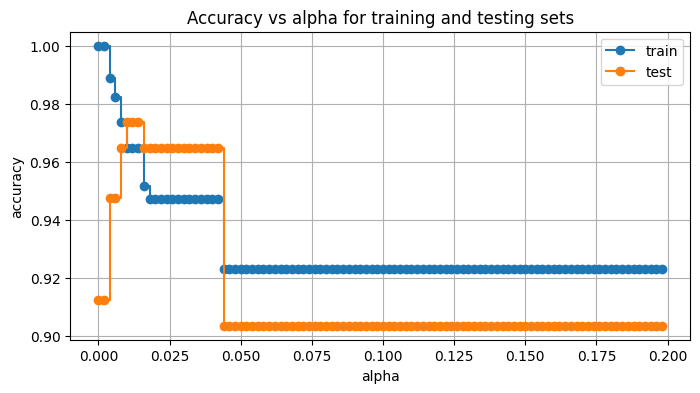

In [97]:
def plot_acc_vs_ccp(accuracies_train, accuracies_test, ccps):
  fig, ax = plt.subplots(figsize=(8, 4))
  ax.set_xlabel("alpha")
  ax.set_ylabel("accuracy")
  ax.set_title("Accuracy vs alpha for training and testing sets")
  ax.plot(ccps, accuracies_train, marker="o", label="train", drawstyle="steps-post")
  ax.plot(ccps, accuracies_test, marker="o", label="test", drawstyle="steps-post")
  ax.legend()
  ax.grid()
  plt.show()


accs_train = []
accs_test = []
ccps = [k * 0.001 for k in range(0, 200, 2)]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
for ccp in ccps:
  dt = DecisionTreeClassifier(ccp_alpha=ccp, random_state=0)
  dt.fit(X_train, y_train)

  y_pred_train = dt.predict(X_train)
  acc_train = accuracy_score(y_train, y_pred_train)

  y_pred_test = dt.predict(X_test)
  acc_test = accuracy_score(y_test, y_pred_test)

  accs_train.append(acc_train)
  accs_test.append(acc_test)

plot_acc_vs_ccp(accs_train, accs_test, ccps)